## Exploratory Data Analysis
Investigação e visualização inicial dos dados.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
from src.viz import plot_histograms, plot_boxplot_all_features, plot_corr_heatmap

PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: f"{x:.2f}") #Formatação das variáveis do tipo float

In [6]:
df_raw = pd.read_csv("../data/raw/CC GENERAL.csv")
df_raw.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.00,0.00,NaN,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12


In [7]:
df_raw.shape

(8950, 18)

In [8]:
df_raw.info()

<class 'pandas.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   str    
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHASES_TRX    

In [9]:
df_raw.dtypes.value_counts()

float64    14
int64       3
str         1
Name: count, dtype: int64

_float64 predominante: Sem nenhum problema para o modelo._

In [10]:
df = df_raw.drop(columns=["CUST_ID"])

_ID não deve entrar na clusterização._

In [11]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_TRX                         0
PAYMENTS                              0
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
(df.isnull().mean() * 100).sort_values(ascending=False)


MINIMUM_PAYMENTS                   3.50
CREDIT_LIMIT                       0.01
BALANCE                            0.00
BALANCE_FREQUENCY                  0.00
PURCHASES                          0.00
CASH_ADVANCE                       0.00
PURCHASES_FREQUENCY                0.00
ONEOFF_PURCHASES                   0.00
INSTALLMENTS_PURCHASES             0.00
PURCHASES_INSTALLMENTS_FREQUENCY   0.00
ONEOFF_PURCHASES_FREQUENCY         0.00
CASH_ADVANCE_TRX                   0.00
CASH_ADVANCE_FREQUENCY             0.00
PURCHASES_TRX                      0.00
PAYMENTS                           0.00
PRC_FULL_PAYMENT                   0.00
TENURE                             0.00
dtype: float64

_Esperado missing em MINIMUM_PAYMENTS e pode indicar um grupo de clientes que nunca pagou o mínimo._

In [13]:
df.duplicated().sum()


np.int64(0)

_Nenhum dado duplicado._

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.00,1564.47,2081.53,0.00,128.28,873.39,2054.14,19043.14
BALANCE_FREQUENCY,8950.00,0.88,0.24,0.00,0.89,1.00,1.00,1.00
PURCHASES,8950.00,1003.20,2136.63,0.00,39.63,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.00,592.44,1659.89,0.00,0.00,38.00,577.40,40761.25
INSTALLMENTS_PURCHASES,8950.00,411.07,904.34,0.00,0.00,89.00,468.64,22500.00
CASH_ADVANCE,8950.00,978.87,2097.16,0.00,0.00,0.00,1113.82,47137.21
PURCHASES_FREQUENCY,8950.00,0.49,0.40,0.00,0.08,0.50,0.92,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.00,0.20,0.30,0.00,0.00,0.08,0.30,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.00,0.36,0.40,0.00,0.00,0.17,0.75,1.00
CASH_ADVANCE_FREQUENCY,8950.00,0.14,0.20,0.00,0.00,0.00,0.22,1.50


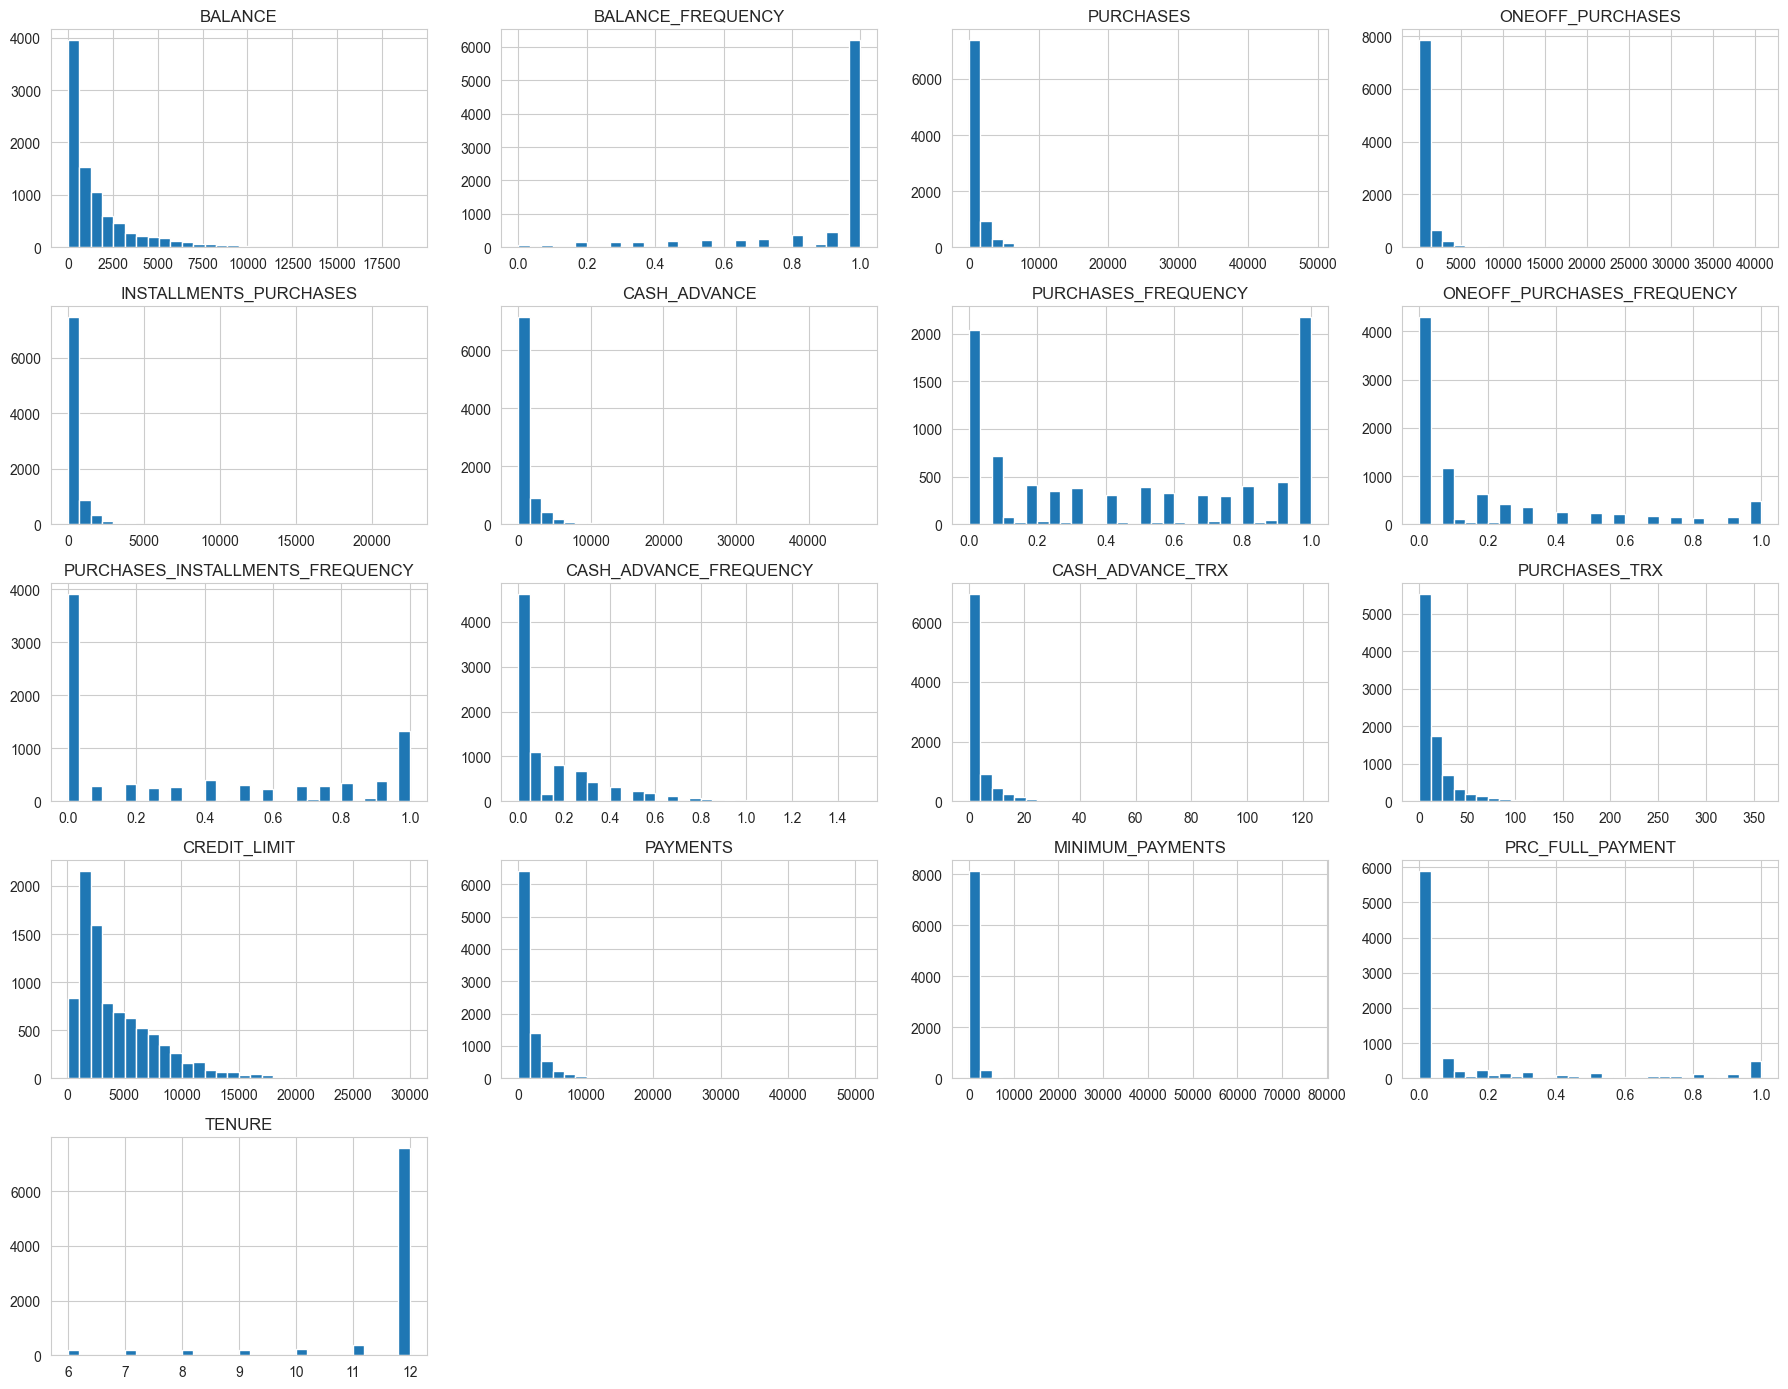

In [15]:
plot_histograms(df, figsize=(18, 14), bins=30)

_É possível indentificar assimetria, outliers extremos e variáveis com escalas muito distintas._

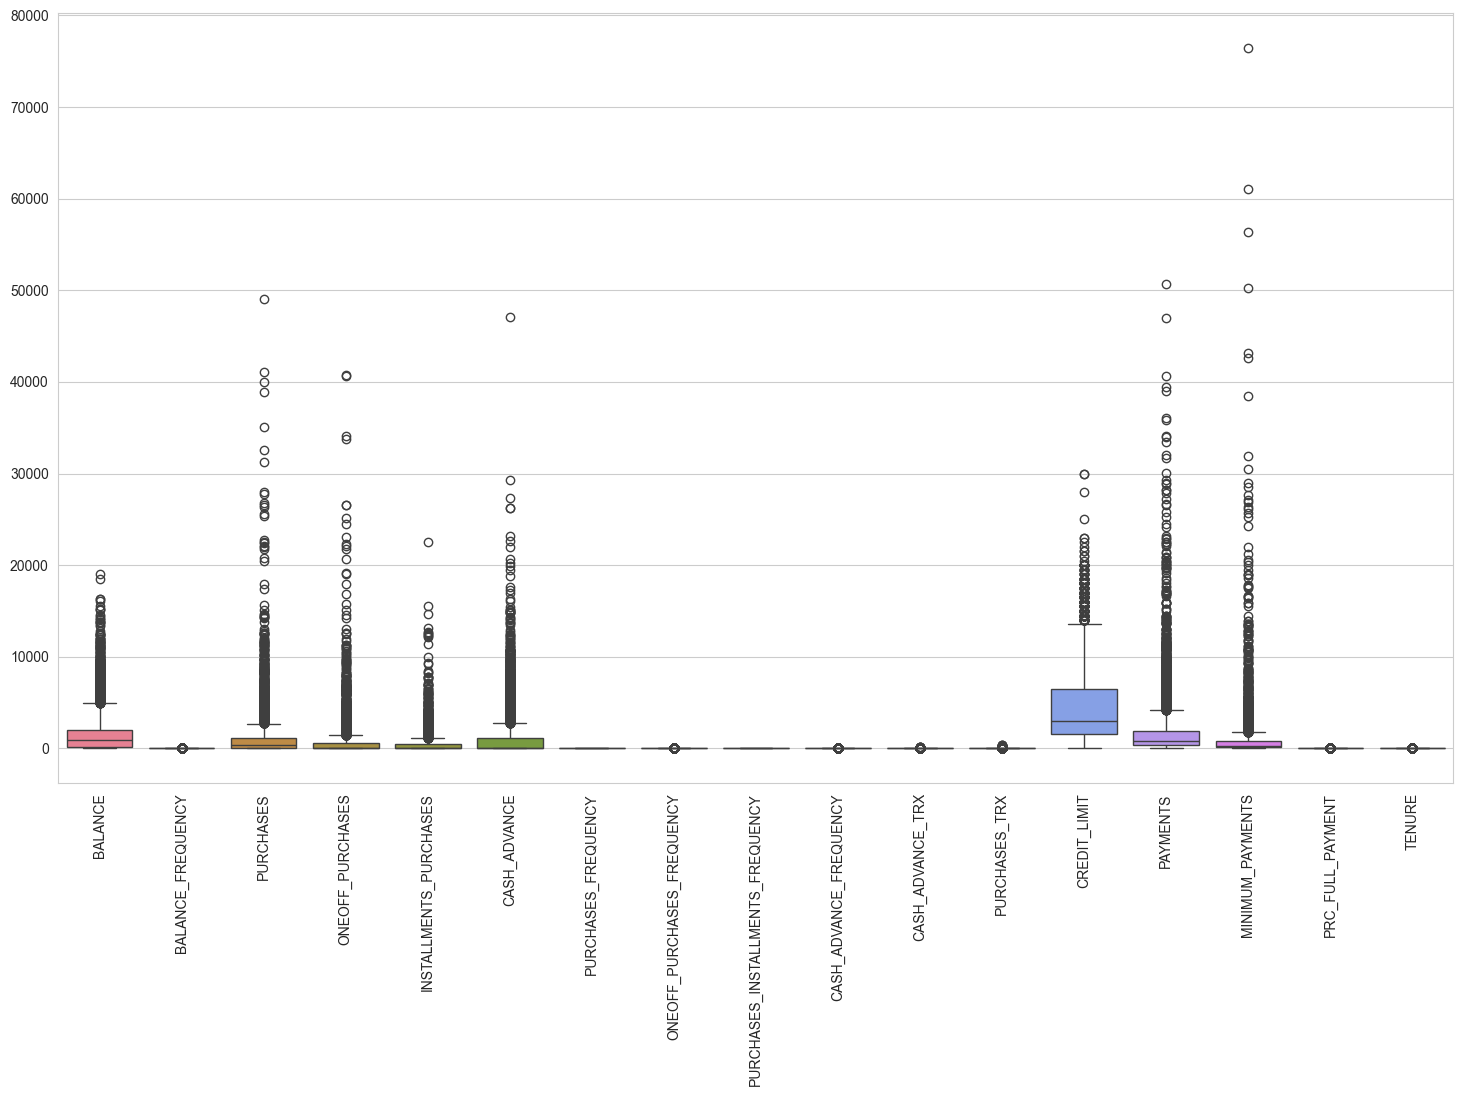

In [16]:
plot_boxplot_all_features(df, figsize=(18, 10), rotate_xticks=90)

_É possível identificar que as variáveis presentes são heavy-tailed, o que impacta diretamente o Kmeans, que é extremamente sensível a outiliers, e também a disntância euclidiana no método aglomerativo._

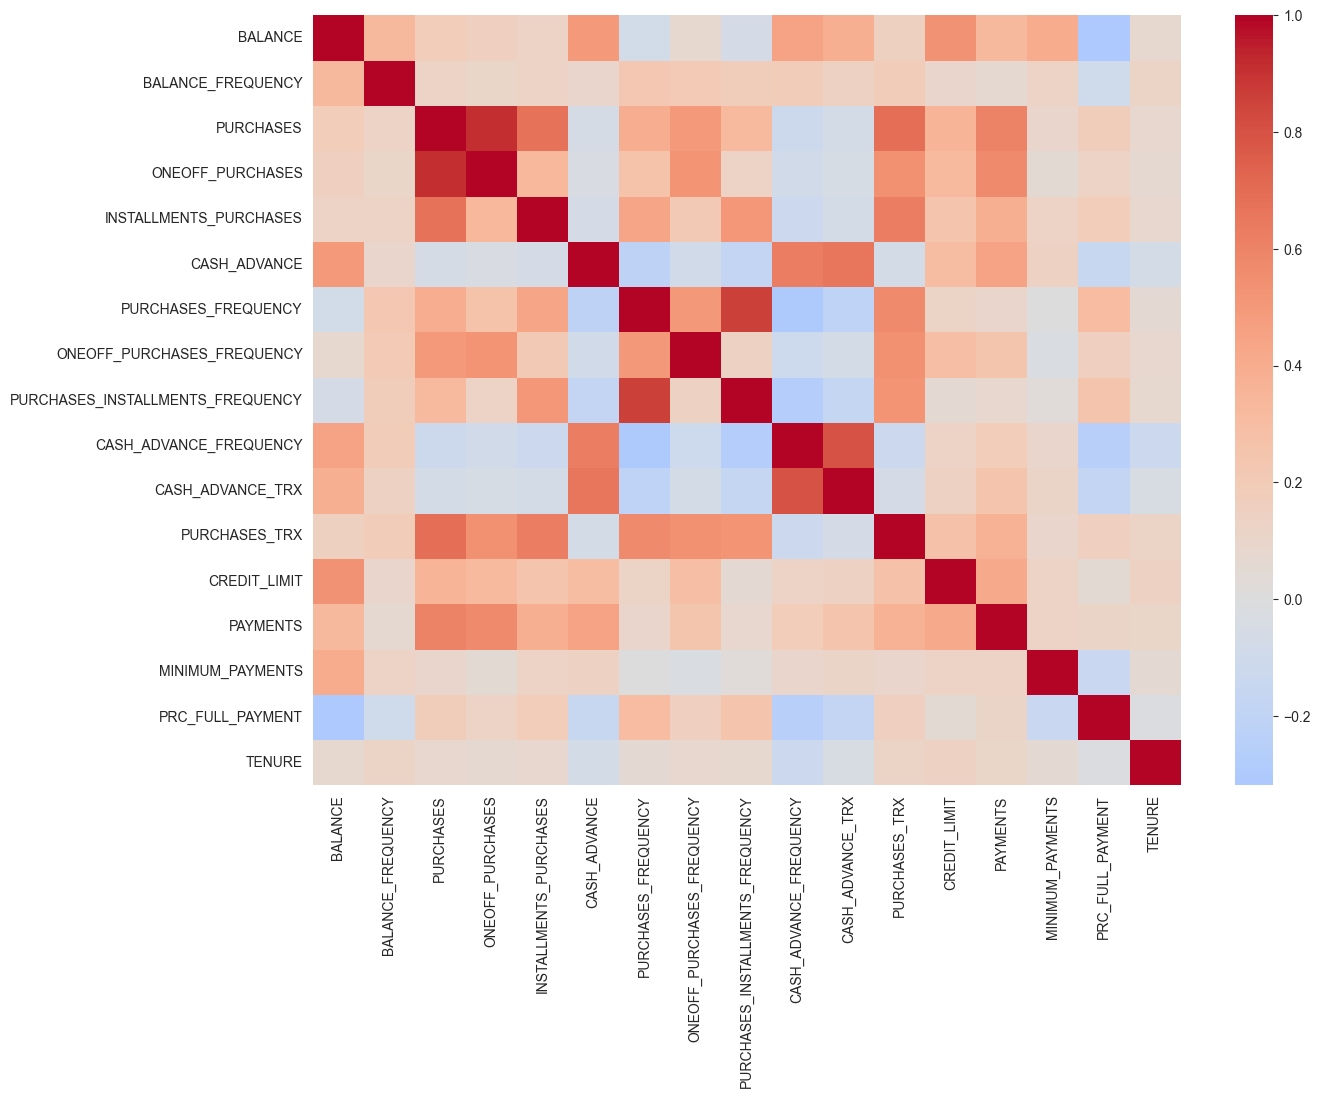

In [17]:
plot_corr_heatmap(df, figsize=(14, 10), cmap="coolwarm", center=0)

_Utilizando correlação para indicação_

In [18]:
df.std().sort_values(ascending=False)

CREDIT_LIMIT                       3638.82
PAYMENTS                           2895.06
MINIMUM_PAYMENTS                   2372.45
PURCHASES                          2136.63
CASH_ADVANCE                       2097.16
BALANCE                            2081.53
ONEOFF_PURCHASES                   1659.89
INSTALLMENTS_PURCHASES              904.34
PURCHASES_TRX                        24.86
CASH_ADVANCE_TRX                      6.82
TENURE                                1.34
PURCHASES_FREQUENCY                   0.40
PURCHASES_INSTALLMENTS_FREQUENCY      0.40
ONEOFF_PURCHASES_FREQUENCY            0.30
PRC_FULL_PAYMENT                      0.29
BALANCE_FREQUENCY                     0.24
CASH_ADVANCE_FREQUENCY                0.20
dtype: float64

In [19]:
df.skew().sort_values(ascending=False)

MINIMUM_PAYMENTS                   13.62
ONEOFF_PURCHASES                   10.05
PURCHASES                           8.14
INSTALLMENTS_PURCHASES              7.30
PAYMENTS                            5.91
CASH_ADVANCE_TRX                    5.72
CASH_ADVANCE                        5.17
PURCHASES_TRX                       4.63
BALANCE                             2.39
PRC_FULL_PAYMENT                    1.94
CASH_ADVANCE_FREQUENCY              1.83
ONEOFF_PURCHASES_FREQUENCY          1.54
CREDIT_LIMIT                        1.52
PURCHASES_INSTALLMENTS_FREQUENCY    0.51
PURCHASES_FREQUENCY                 0.06
BALANCE_FREQUENCY                  -2.02
TENURE                             -2.94
dtype: float64

## Estrutura Geral do Dataset
8950 observações
17 variáveis numéricas (após remover CUST_ID)
Apenas 2 variáveis com missing
- MINIMUM_PAYMENTS: 313 (~3,5%)
- CREDIT_LIMIT: 1 caso (irrelevante estatisticamente)

Dataset limpo, sem problema sério de completude. Não há dados duplicados.

### Assimetria Extrema e outliers
- Distribuição heavy-tailed
- Concentração massiva próxima de zero
- Poucos clientes com valores muito altos
- Muitos outliers extremos


### Necessário um pré processamento com a correção de assimetria, outliers e padronização da escala.